In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show
import matplotlib

In [28]:
!pipreqs --print

matplotlib==3.5.3
numpy==1.23.2
opencv_python==4.6.0.66
pandas==1.4.3
regex==2022.8.17


INFO: Successfully output requirements


## Image Data Aumentation

> In this notebook, we will explore ten most comonly used methode for image data augmentation. For the simplicity, I took one sample image from my image dataset and used various augmentations to generate and disply four augmented images. The later part of this notebook covers the four filling options of the newly created space in our augmented images.

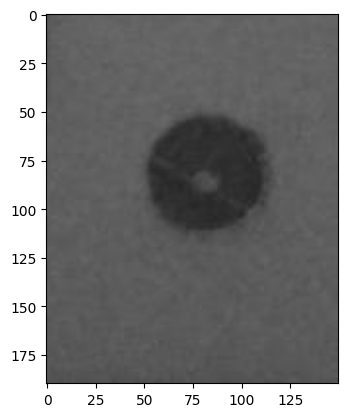

(190, 150, 3)
(1, 190, 150, 3)


In [4]:
image = imread("D:/UoH_PhD_Exp/Data/Crop_images/B1/1_B1_Layer_1042.jpg")

# Creating a dataset which contains just one image.
X_images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(X_images[0])
show()
print(X_images[0].shape)
print(X_images.shape)

In [13]:
def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(X_images)
    image_iterator = data_generator.flow(X_images)
    '''
    # Save fisrt 4 images to disk.
    for x, val in zip(data_generator.flow(
        X_images,                        # image we chose
        save_to_dir="D:/UoH_PhD_Exp/Data/Porosity_Augmented_examples",     # this is where we figure out where to save
        save_prefix='Croped_',         # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(3)) : # here we define a range because we want 4 augmented images otherwise it will keep looping forever I think
        pass
    '''
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('on')
    show()
    


## 1. Rotation

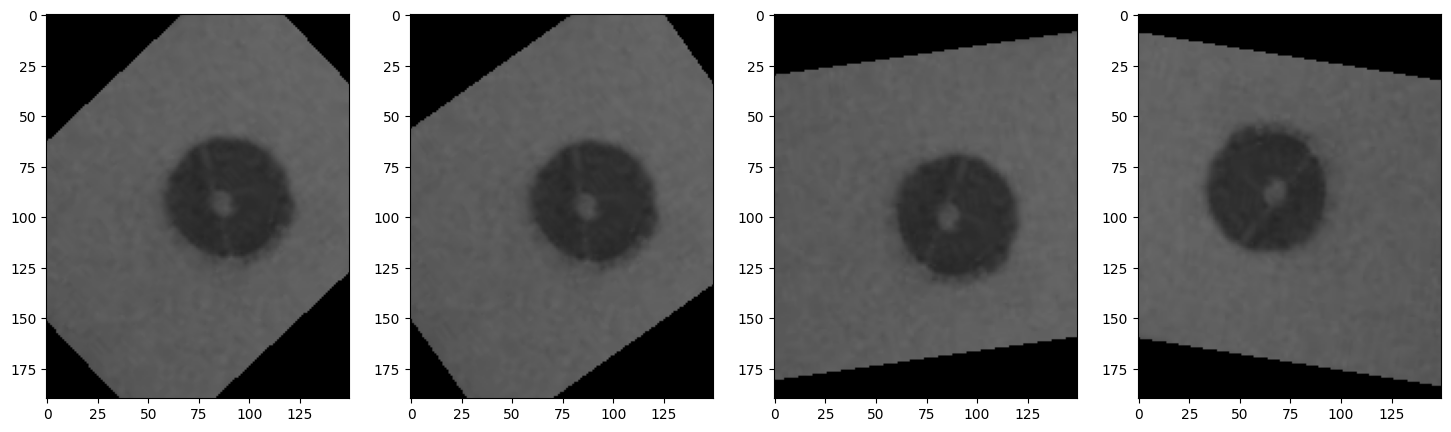

In [14]:
data_generator = ImageDataGenerator(rotation_range=90, fill_mode='constant')
plot(data_generator)

## 2. Width Shifting

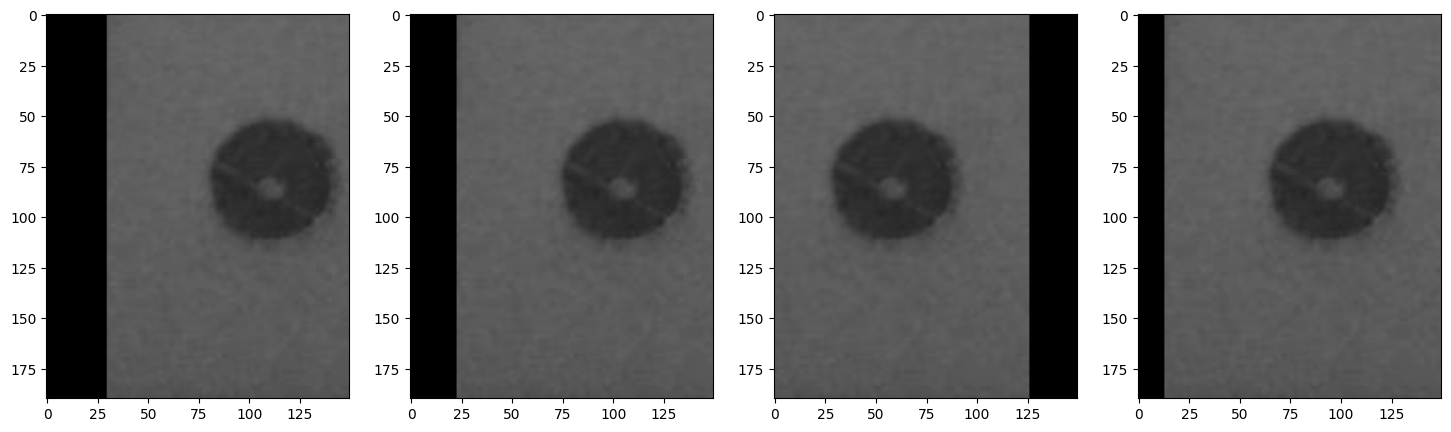

In [15]:
data_generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='constant') #0-1
plot(data_generator)

## 3. Height Shifting

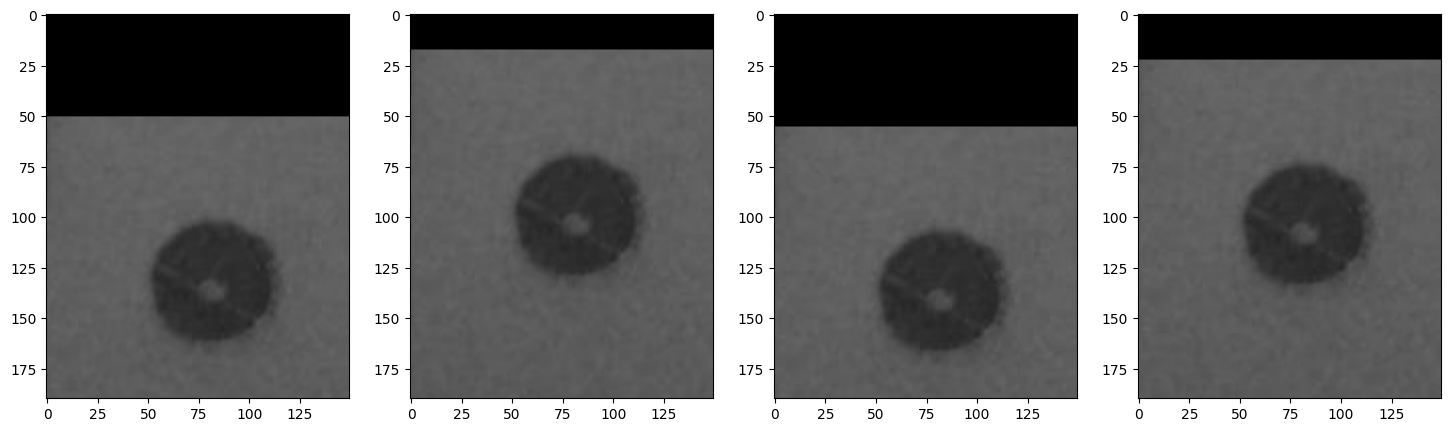

In [16]:
data_generator = ImageDataGenerator(height_shift_range=0.3, fill_mode='constant') #0-1
plot(data_generator)

## 4. Brightness

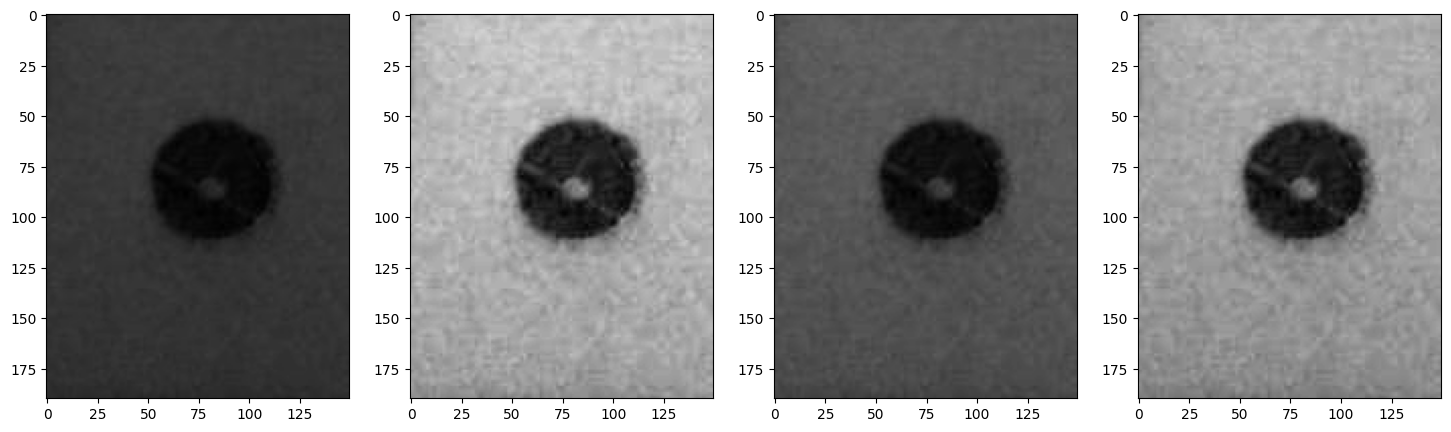

In [17]:
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9)) #0-1
plot(data_generator)

## 5. Shear Intensity

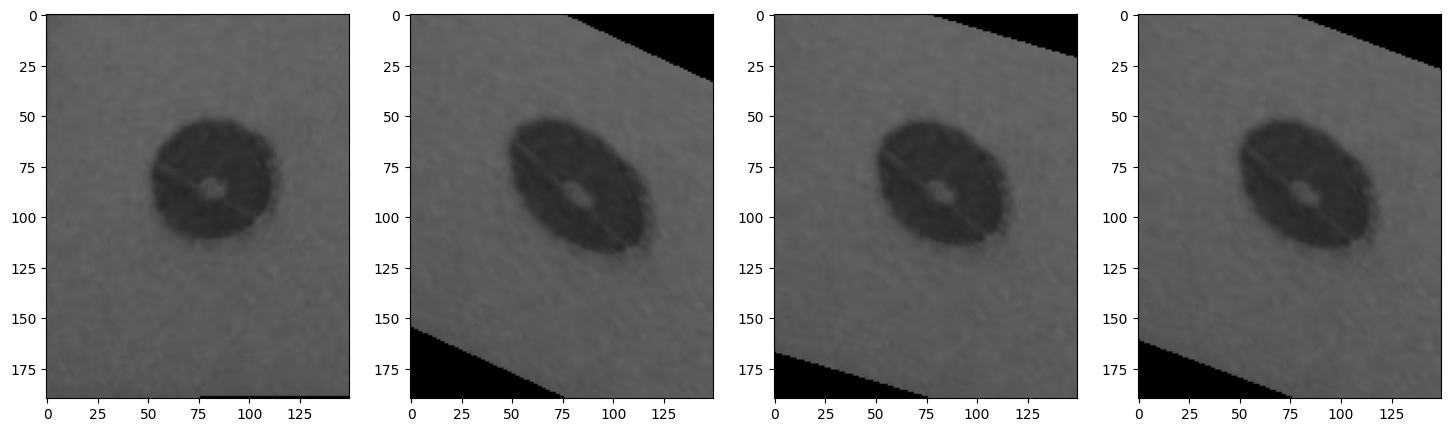

In [18]:
data_generator = ImageDataGenerator(shear_range=45.0, fill_mode='constant')
plot(data_generator)

## 6. Zoom

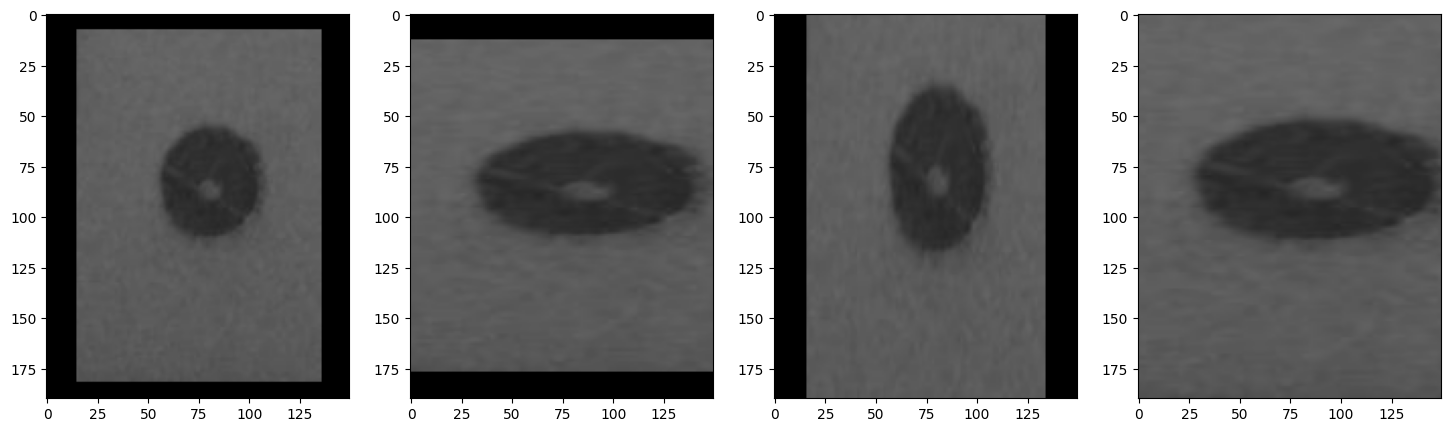

In [19]:
data_generator = ImageDataGenerator(zoom_range=[0.5, 1.5], fill_mode='constant') #zoom in < 1 > zoom out
plot(data_generator)

## 7. Channel Shift

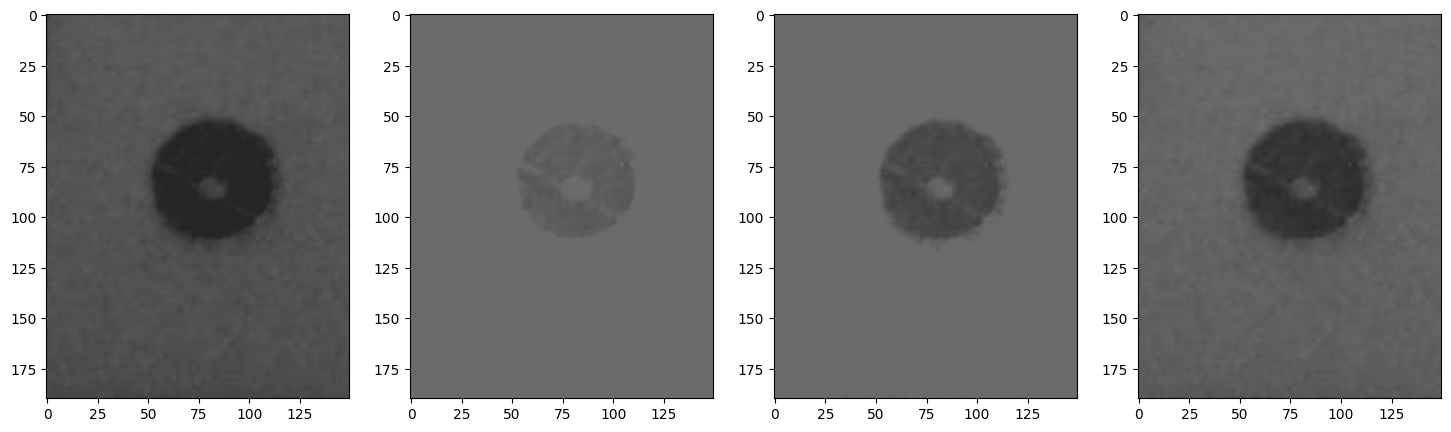

In [20]:
data_generator = ImageDataGenerator(channel_shift_range=50.0)
plot(data_generator)

## 8. Horizontal Flip

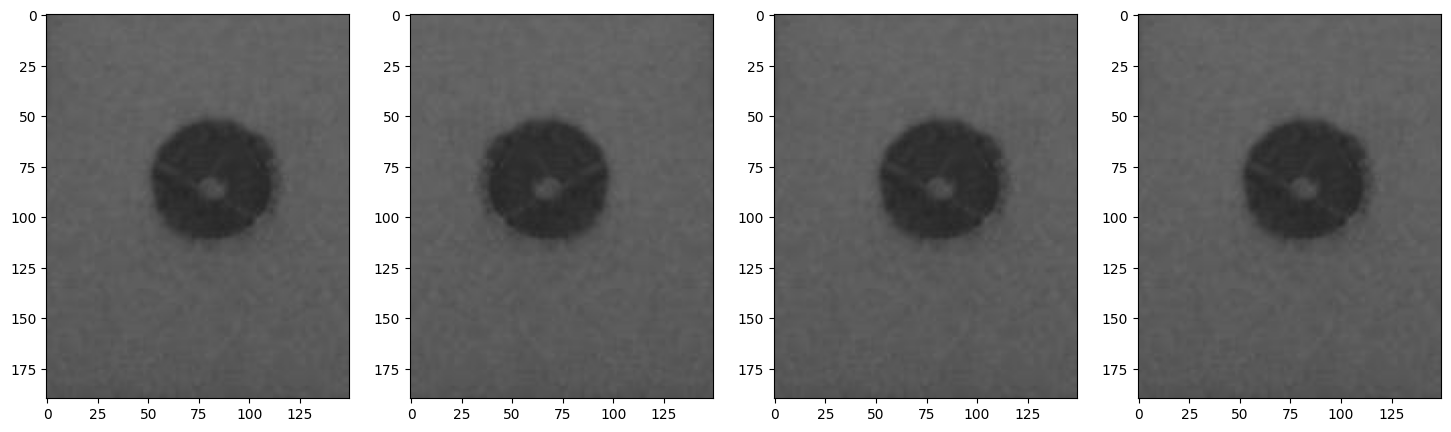

In [21]:
data_generator = ImageDataGenerator(horizontal_flip=True, fill_mode='constant')
plot(data_generator)

## 9. Vertical Flip

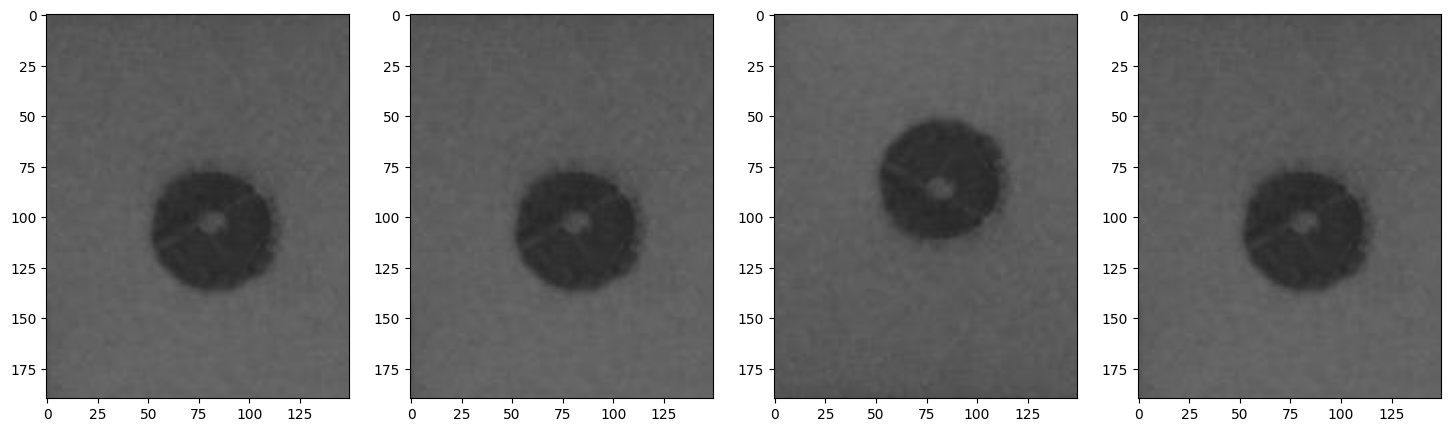

In [22]:
data_generator = ImageDataGenerator(vertical_flip=True, fill_mode='constant')
plot(data_generator)

# Techniqes to fill the newly created parts of the images

## 1. Nearest

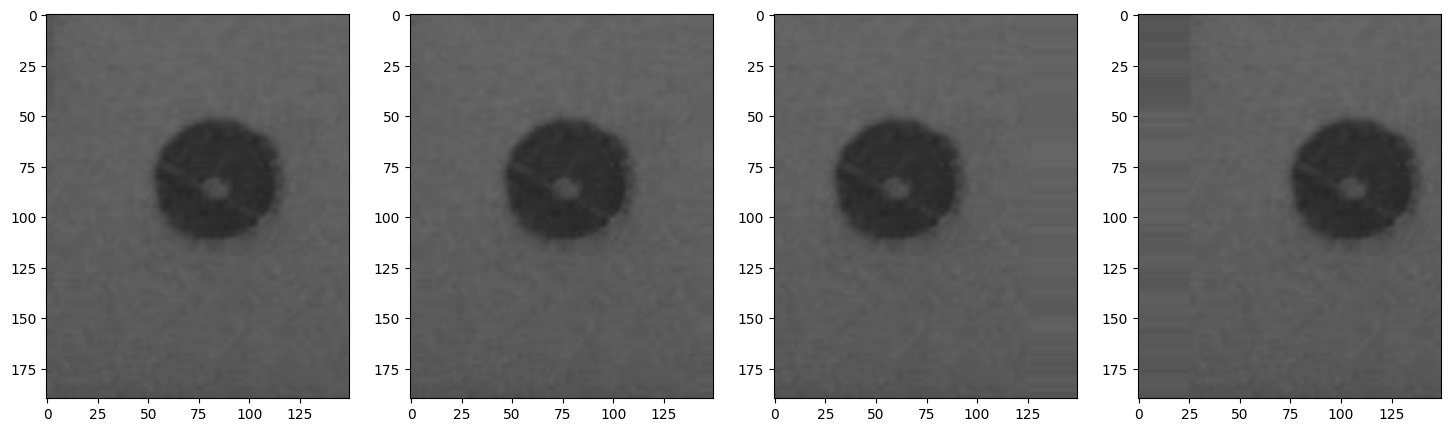

In [23]:
data_generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='nearest')
plot(data_generator)

## 2. Reflect

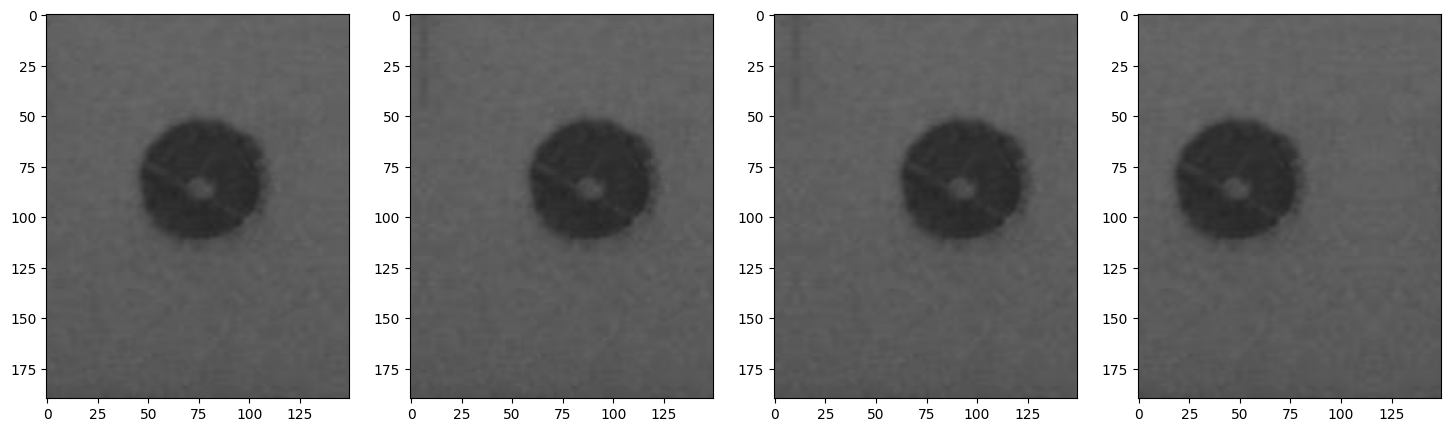

In [24]:

data_generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='reflect')
plot(data_generator)

## 3. Wrap

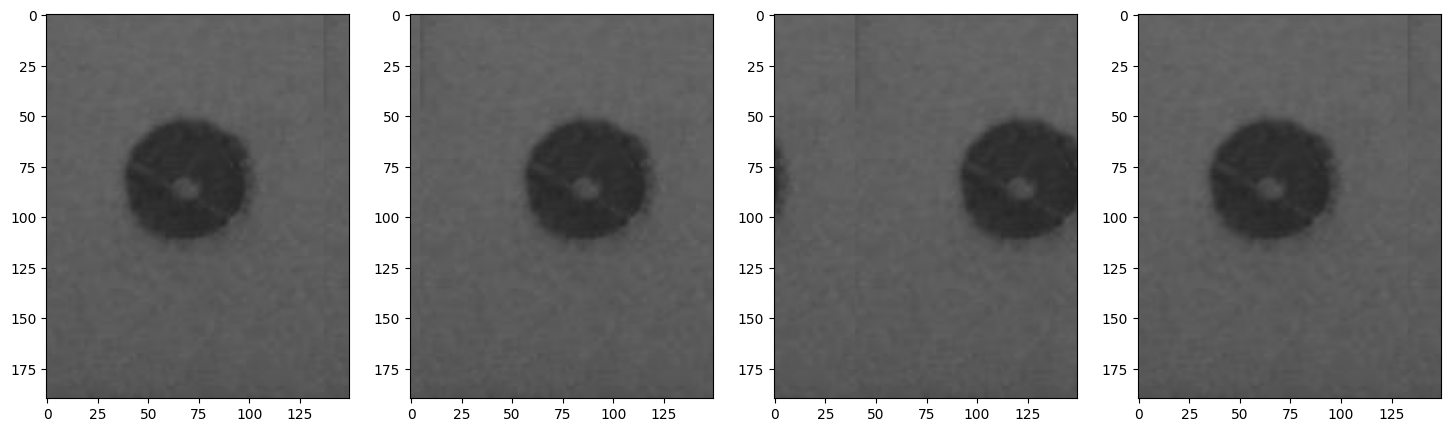

In [25]:
data_generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='wrap')
plot(data_generator)

## 4. Constant

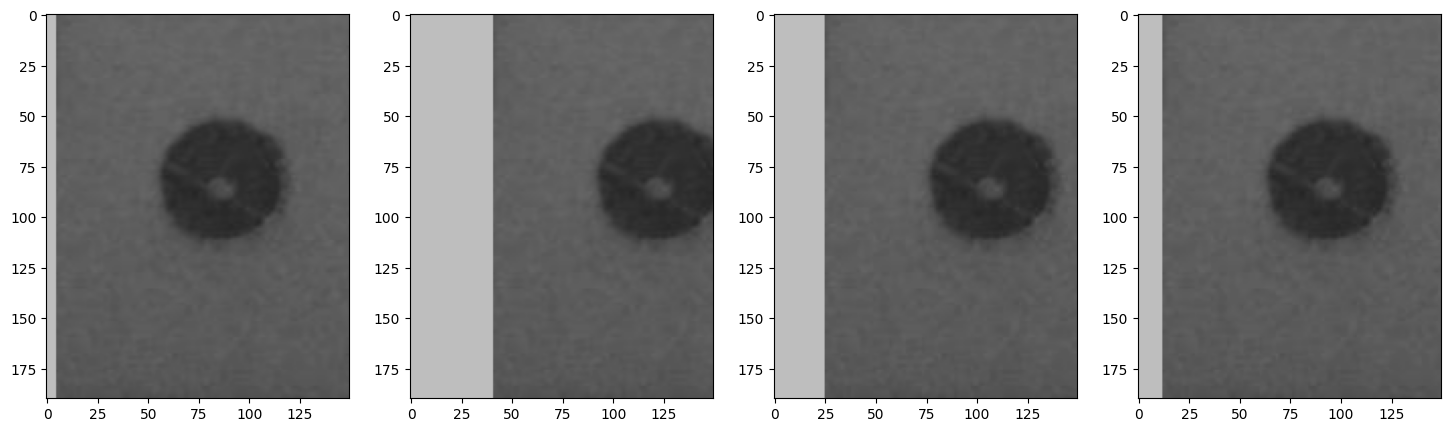

In [26]:
data_generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='constant', cval=190)
plot(data_generator)

Source: https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844

Author: Sumit Sarin
